In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("sonar_dataset.csv")

In [3]:
df.head(4)

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df.shape

(207, 61)

In [6]:
df.isna().sum()

0.0200    0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
         ..
0.0180    0
0.0084    0
0.0090    0
0.0032    0
R         0
Length: 61, dtype: int64

In [7]:
df.columns

Index(['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539',
       '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645',
       '0.0660', '0.2273', '0.3100', '0.2999', '0.5078', '0.4797', '0.5783',
       '0.5071', '0.4328', '0.5550', '0.6711', '0.6415', '0.7104', '0.8080',
       '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537',
       '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834',
       '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383',
       '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167',
       '0.0180', '0.0084', '0.0090', '0.0032', 'R'],
      dtype='object')

In [23]:
df["R"].value_counts()

M    111
R     96
Name: R, dtype: int64

In [26]:
x = df.drop("R",axis =1)
y = df["R"]

In [27]:
y[:5]

0    R
1    R
2    R
3    R
4    R
Name: R, dtype: object

In [28]:
df["R"].replace({"M":1,"R":0},inplace=True)

In [29]:
y.value_counts()

1    111
0     96
Name: R, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=5)

In [32]:
x_train.shape,x_test.shape

((165, 60), (42, 60))

In [33]:
!pip install tensorflow

In [35]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([ 
     keras.layers.Dense(60,input_dim =60,activation ="relu"),
     keras.layers.Dense(30,activation = "relu"),
     keras.layers.Dense(15,activation = "relu"),
    keras.layers.Dense(1,activation = "sigmoid") 
])
model.compile(loss = "binary_crossentropy", optimizer = "adam",metrics = ["accuracy"])
model.fit(x_train,y_train,epochs = 100,batch_size = 8)

C:\Users\abc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.4805 - loss: 0.7207
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5966 - loss: 0.6679
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7135 - loss: 0.6435
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6880 - loss: 0.6235
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7658 - loss: 0.5713
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8007 - loss: 0.5247
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7844 - loss: 0.5003
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8623 - loss: 0.4378
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8402 - loss: 0.4343
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8167 - loss: 0.4220
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8887 - loss: 0.3481
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accur

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0062
Epoch 70/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0060
Epoch 71/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0056 
Epoch 72/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0050   
Epoch 73/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0062
Epoch 74/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0045  
Epoch 75/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0041 
Epoch 76/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0038
Epoch 77/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0050 
Epoch 78/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0050
Epoch 79/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 1.0000 - loss: 0.0041
Epoch 80/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc

In [36]:
model.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8264 - loss: 1.1983 


[1.1514909267425537, 0.8333333134651184]

In [37]:
yp = model.predict(x_test)
yp[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step


array([[0.9999964 ],
       [0.4577005 ],
       [0.9999002 ],
       [0.99997747],
       [0.9982794 ]], dtype=float32)

In [39]:
y_pred = model.predict(x_test).reshape(-1)
print(y_pred[:10])
y_pred = np.round(y_pred)
print(y_pred[:10])


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  
[9.9999642e-01 4.5770049e-01 9.9990022e-01 9.9997747e-01 9.9827939e-01
 9.9997151e-01 9.9999958e-01 9.9965823e-01 9.8059064e-01 8.4147201e-04]
[1. 0. 1. 1. 1. 1. 1. 1. 1. 0.]


In [40]:
y_test[:10]

156    1
21     0
193    1
159    1
34     0
196    1
6      0
25     0
115    1
51     0
Name: R, dtype: int64

In [41]:
from sklearn.metrics import confusion_matrix,classification_report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.86      0.89      0.87        27

    accuracy                           0.83        42
   macro avg       0.82      0.81      0.82        42
weighted avg       0.83      0.83      0.83        42



Text(95.72222222222221, 0.5, 'truth')

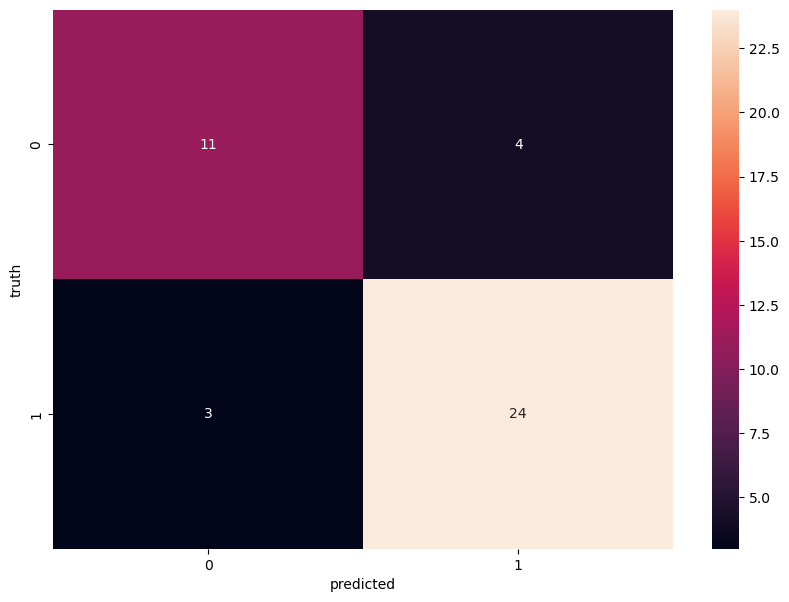

In [42]:
import seaborn as sns 
cm = tf.math.confusion_matrix(labels = y_test,predictions=y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True ,fmt = "d")
plt.xlabel("predicted")
plt.ylabel("truth")

In [44]:
accuracy = round((24+11)/(24+11+4+3),2)

In [45]:
accuracy

0.83

In [46]:
precesion_0 = round(11/(11+3),2)

In [47]:
precesion_0

0.79

In [50]:
precesion_1 = round(24/(24+4),2) 

In [51]:
precesion_1

0.86

In [52]:
recall_0 = round(11/(11+4),2)

In [53]:
recall_0

0.73

In [56]:
recall_1 = round(24/(3+24),2)

In [57]:
recall_1

0.89

# Now we have drop the hidden neurons

In [65]:
model_1 = keras.Sequential([ 
     keras.layers.Dense(60,input_dim = 60,activation = "relu"),
     keras.layers.Dropout(0.5),
     keras.layers.Dense(30,activation ="relu"),
     keras.layers.Dropout(0.5),
     keras.layers.Dense(15,activation="relu"),
     keras.layers.Dropout(0.5),
     keras.layers.Dense(1,activation="sigmoid") 
])
model_1.compile(loss = "binary_crossentropy", optimizer = "adam",metrics = ["accuracy"])
model_1.fit(x_train,y_train,epochs = 100,batch_size = 8)    

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.4700 - loss: 0.7503
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4592 - loss: 0.7371
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4614 - loss: 0.7117
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4427 - loss: 0.7312
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4731 - loss: 0.7004
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5257 - loss: 0.6936
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4475 - loss: 0.6971
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5714 - loss: 0.6809
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5769 - loss: 0.6875
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5809 - loss: 0.6688
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6022 - loss: 0.6731
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accurac

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8421 - loss: 0.3764
Epoch 70/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7989 - loss: 0.4060
Epoch 71/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8554 - loss: 0.3700
Epoch 72/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8485 - loss: 0.3802
Epoch 73/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8129 - loss: 0.3826
Epoch 74/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7871 - loss: 0.4202
Epoch 75/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8107 - loss: 0.4197
Epoch 76/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7834 - loss: 0.4667
Epoch 77/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8109 - loss: 0.4767
Epoch 78/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8226 - loss: 0.3903
Epoch 79/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8490 - loss: 0.3481
Epoch 80/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0

In [66]:
model_1.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7212 - loss: 0.5288 


[0.5031159520149231, 0.738095223903656]

In [68]:
from sklearn.metrics import confusion_matrix,classification_report


In [69]:
y_pred1 = model_1.predict(x_test).reshape(-1)
print(y_pred1[:10]) 
y_pred1 = np.round(y_pred1)
print(y_pred1[:10])

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step
[0.957434   0.75223553 0.93295157 0.942841   0.8205815  0.9839654
 0.9897849  0.7584554  0.8873325  0.081398  ]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


In [70]:
y_test[:10]

156    1
21     0
193    1
159    1
34     0
196    1
6      0
25     0
115    1
51     0
Name: R, dtype: int64

In [71]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62        15
           1       0.79      0.81      0.80        27

    accuracy                           0.74        42
   macro avg       0.71      0.71      0.71        42
weighted avg       0.73      0.74      0.74        42

